In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris=load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
iris_pd=sns.load_dataset('iris')

In [17]:
iris_pd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


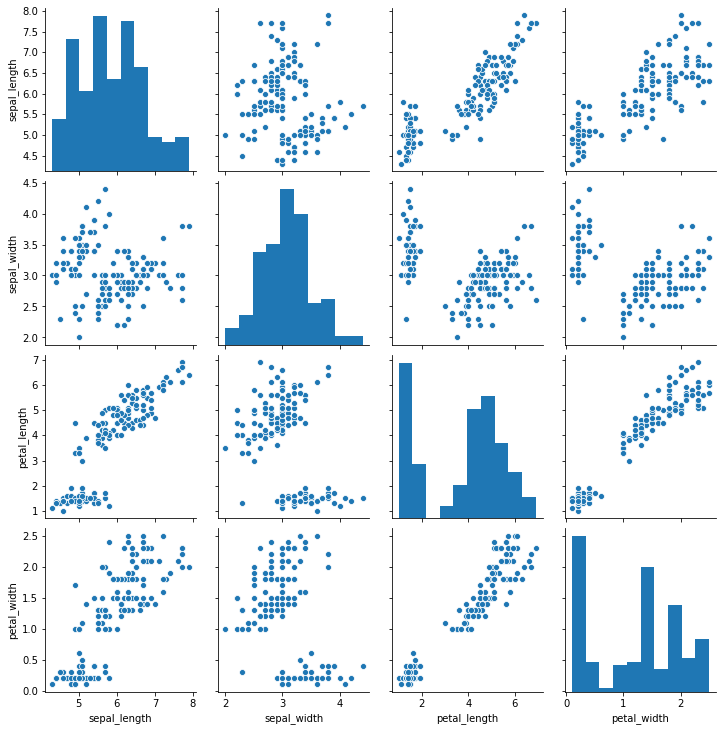

In [18]:
sns.pairplot(iris_pd)

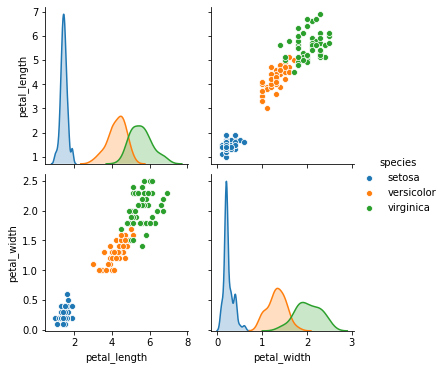

In [20]:
sns.pairplot(iris_pd,vars=['petal_length','petal_width'],hue='species')

In [24]:
# 모델링

from sklearn.tree import DecisionTreeClassifier

x=iris.data[:, 2:]
y=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2,random_state=13)
tree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [29]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=['petal_length','petal_width'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [32]:
import graphviz
with open('iris_tree.dot') as f:
    dot_graph=f.read()
    
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='iris_tree',directory='',cleanup=True)
dot

ExecutableNotFound: failed to execute ['dot', '-Tpng', '-O', 'iris_tree'], make sure the Graphviz executables are on your systems' PATH

In [33]:
raw_data = pd.read_excel('titanic.xls')

In [35]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [37]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [38]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


NameError: name 'explode' is not defined

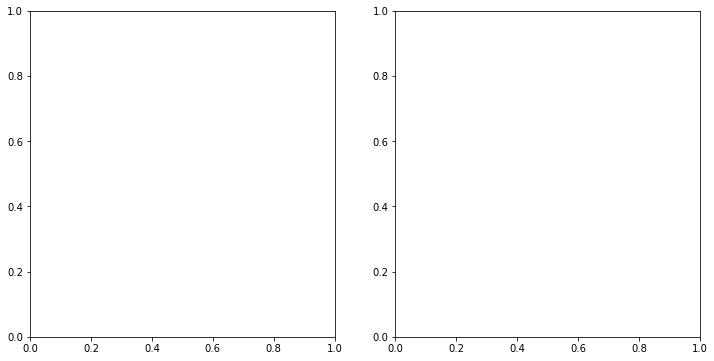

In [40]:
f,ax=plt.subplots(1,2,figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode[0,0.1],
                                            autopct='%1.2f%%',ax=ax[0])

In [41]:
# 나이 구간별 성별 생존율 분석

raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins = [0,3,7,15,30,60,100],
                             labels=['baby','children','teenage','young','adult','old'])

raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


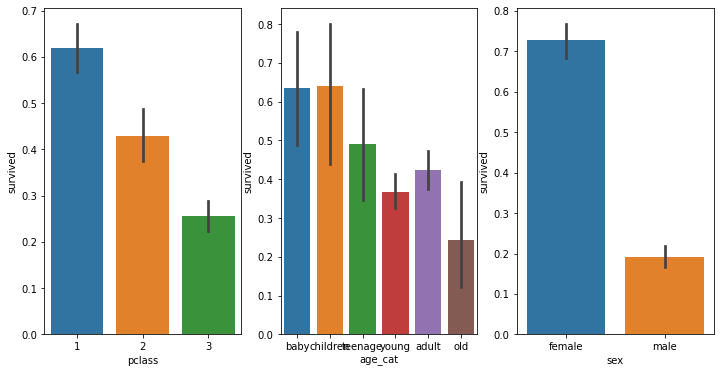

In [42]:
f, ax = plt.subplots(1, 3, figsize=(12, 6))
sns.barplot('pclass', 'survived', data = raw_data, ax = ax[0])

sns.barplot('age_cat', 'survived', data = raw_data, ax = ax[1])

sns.barplot('sex', 'survived', data = raw_data, ax = ax[2])

plt.show()
